## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import pandas as pd
import numpy as np

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [3]:
data = df = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
print(f"Data size: {data.shape}")
data.head()
data.tail()

Data size: (1000, 21)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [4]:
data.isnull().sum().sum ()

0

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [5]:
data.groupby("purpose")["amount"].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [6]:
np.sum((data["age"] < 30) & (data["housing"] == "rent"))/np.sum(data["age"] < 30)
np.sum((data["age"] > 40) & (data["housing"] == "rent"))/np.sum(data["age"] > 40)

0.6801470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [7]:
#data.number_credits.dtype
np.sum((data["foreign_worker"] == 'yes') & (data["number_credits"] > '3'))

1

### Задание 6 (1 балл)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

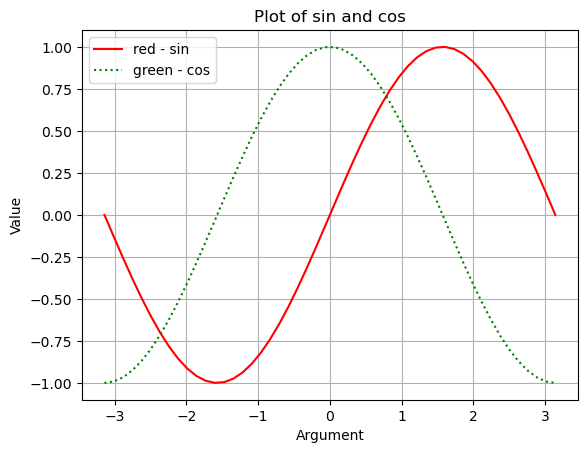

In [9]:
x = np.linspace(-1*np.pi, np.pi)
y = np.sin(x)
z = np.cos(x)
plt.plot(x, y, 'r', x, z, ':g')
plt.xlabel("Argument")
plt.ylabel("Value")
plt.title("Plot of sin and cos")
plt.legend(['red - sin', 'green - cos'])
plt.grid()
plt.show()
#график синуса и косинуса, первый нечетный, второой четный, что можно понять по симметрии относительно О или ОУ. Обе функции периодичны, период равен 2пи, что также видно на графике. Максимумы и минимумы у обоих функций +1 и -1. 

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

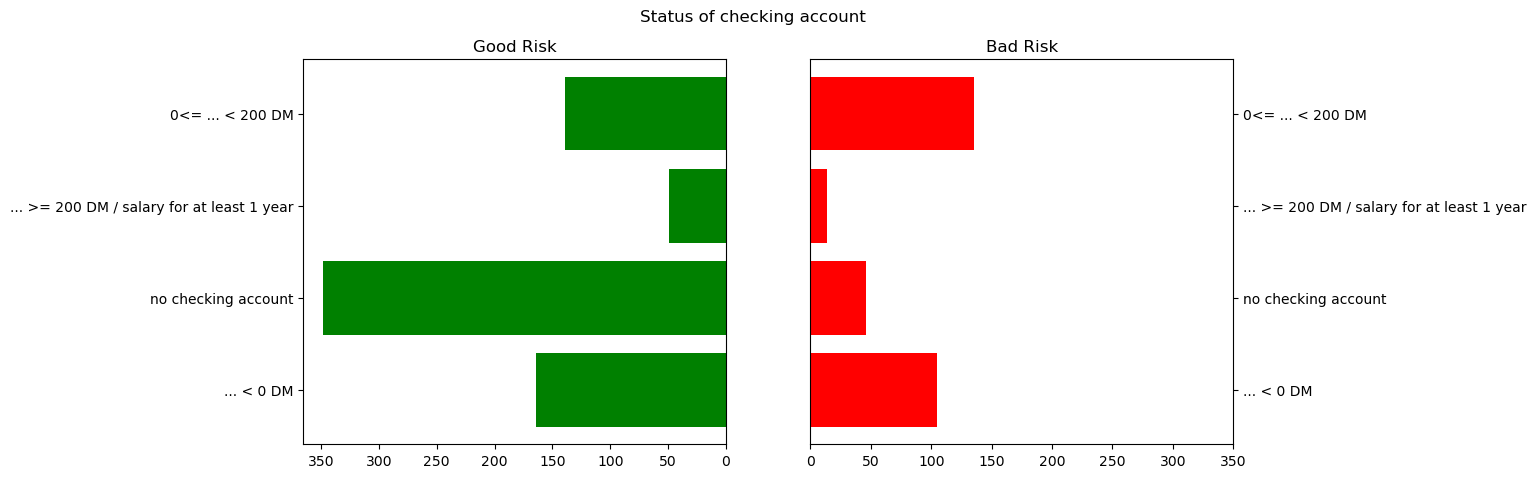

In [10]:
data1 = data.assign(F = 1)
datag = data1.loc[(data1["credit_risk"] == 'good')]
datab = data1.loc[(data1["credit_risk"] == 'bad')]
yg = datag.groupby('status')['F'].sum()
yb = datab.groupby('status')["F"].sum()

plt.figure(figsize = (12, 5))
plt.suptitle('Status of checking account')

fig1 = plt.subplot(1, 2, 1)
plt.title("Good Risk")
plt.barh(datag.status.unique(), yg, color = "green")
plt.gca().invert_xaxis()

fig2 = plt.subplot(1, 2, 2, sharey=fig1)
plt.title("Bad Risk")
plt.barh(datab.status.unique(), yb, color = "red")
fig2.yaxis.tick_right()
plt.xlim([0, 350])


plt.show()
#По графику видно, что банк имеет значительно больше клиентов категории Good, чем Bad. Только в одной категории из 4 банк выдал примерно одинаковое количество положительных и отрицательных рисков - 0<=... < 200 DM (примерно 150 штук каждых). Также можно сказать, что больше всего клиентов со статусом no checking account (примерно 400 человек, из которых примерно 350 good) 

### Задание 8  (0.5 балла)

In [11]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

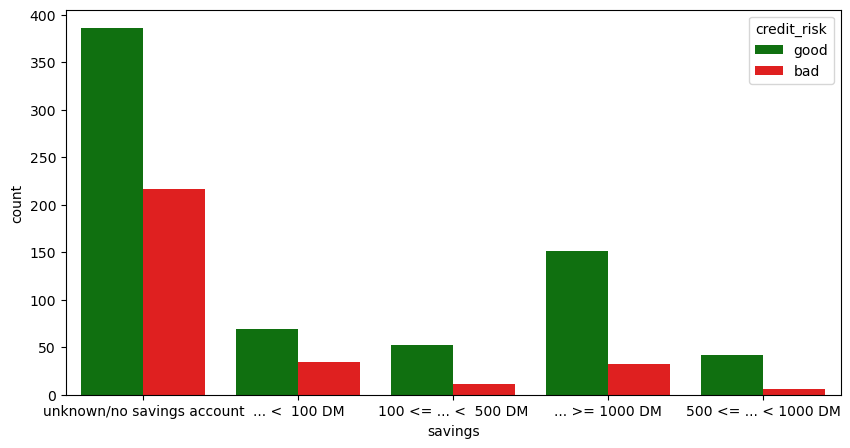

In [12]:
data1 = data.assign(F = 1)
cols = ['green', 'red']
plt.figure(figsize =(10, 5))
sns.barplot(x='savings', y='F', hue = 'credit_risk', data = data1, palette = cols, estimator=sum)
plt.ylabel('count')
plt.xlabel('savings')
plt.show()
#По графику видно, что банк имеет значительно больше клиентов категории Good, чем Bad. Большинство клиентов имеют статус unknown/no savings account (примерно 550 из 1000).

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<AxesSubplot:xlabel='savings', ylabel='age'>

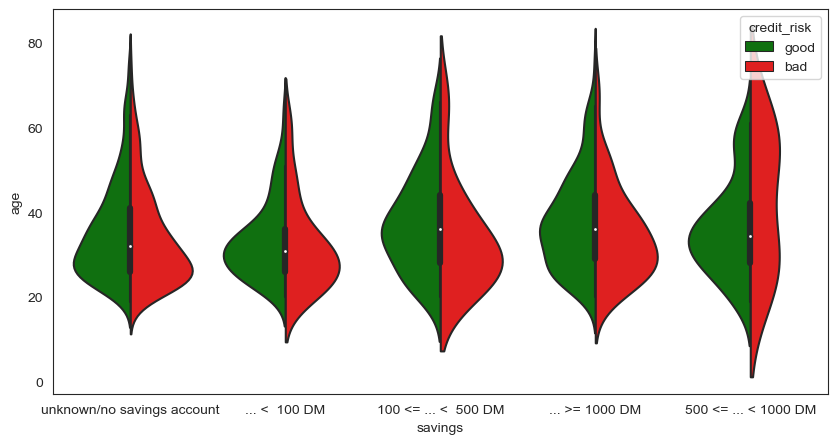

In [13]:
cols = ['green', 'red']
sns.set_style('white')
plt.figure(figsize =(10, 5))
sns.violinplot(x='savings', y='age', hue = 'credit_risk', data=data, split = True, palette = cols)
#Красиво. Самое большое разообразие возрастов умеется у группы со статусом 500<=...<1000DM Bad, наименьшее разнообразие у ...<100 DM Good, так же у этой группы почти самая выраженная мода примерно 30 лет, так как распределение вовсеее не плосковершинное. Кстати плоскоовершинное тут точно распределние 500<=...<1000DM Bad, так даже возможно две моды (примерно 25-30 лет и примерно 60 лет). Ну и все распределения имеют длинный хвост для значений выше 40 лет, что говорит о том, что у банка немного клинтов до 20, но достаточно клиентов пожилого возраста. Пик возраста приходится примерно на 30-35 лет. 

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

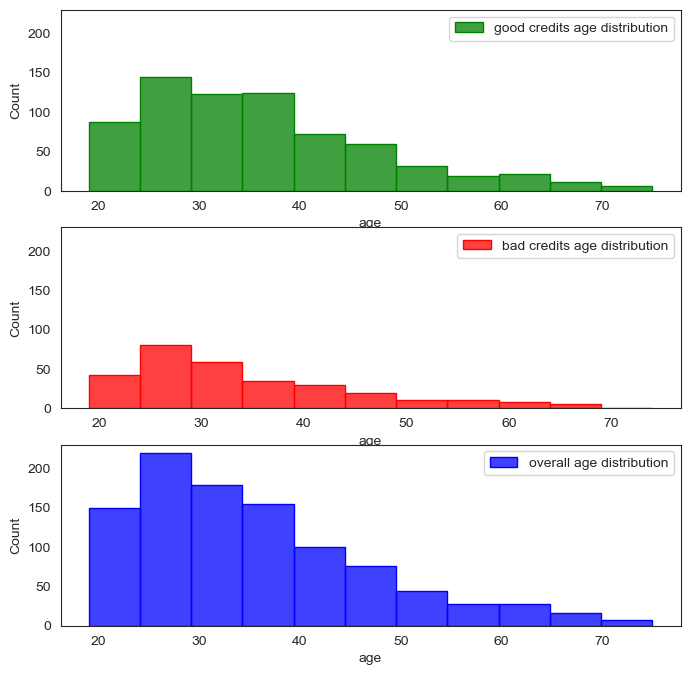

In [14]:
datag = data.loc[(data["credit_risk"] == 'good')]
datab = data.loc[(data["credit_risk"] == 'bad')]
datagood = datag[['age', 'credit_risk']]
databad = datab[['age', 'credit_risk']]
plt.figure(figsize=[8, 8])

fig1 = plt.subplot(3, 1, 1)
good = sns.histplot(datagood['age'], kde=False, 
             bins=11, color = 'green', edgecolor = 'green')
plt.legend(['good credits age distribution'])

fig2 = plt.subplot(3, 1, 2, sharey=fig1)
bad = sns.histplot(databad['age'], kde=False, 
             bins=11, color = 'red', edgecolor = 'red')
plt.legend(['bad credits age distribution'])

fig3 = plt.subplot(3, 1, 3, sharey=fig1)
overall = sns.histplot(data['age'], kde=False, 
             bins=11, color = 'blue', edgecolor = 'blue')
plt.legend(['overall age distribution'])
#По первому графику видно, что больше всего клиентов со статусом good в возрасте от 25-40, совсем нет клиентов до 20 и опять длинный хваст справа. По второму графику видно, что в принципе клинетов со статустом Bad не много, пик возраста приходится на 25-30 лет. По третьему графику видно, что в целом больше всего клиентов возраста 25-30 лет, больше половины младше 35, примерно треть всех младше 30. 

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Text(0, 0.5, 'Duration')

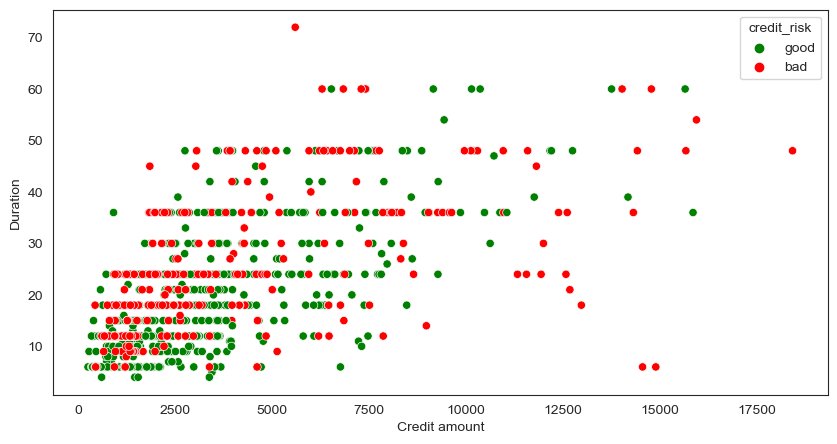

In [15]:
cols = ['green', 'red']
plt.figure(figsize =(10, 5))
sns.scatterplot(data=data, x="amount", y="duration", hue = "credit_risk", palette = cols)
plt.xlabel('Credit amount')
plt.ylabel('Duration')
#Очень крутые точки, полосы как у Шпилькина. На графике видны горизонтальные полосы, то есть чаще всего люди берут кредит на какое-то стандартное количество месяцев (5, 10, 12?, 15, 20 и тд.) САмая большая плотность у начала графика, то есть люди предпочитают занимать небольшие суммы на небольшой период, там же больше всего good статусов. Видна зависимость размера кредита и срока. Выбросы чаще всего имеют статус bad. 

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

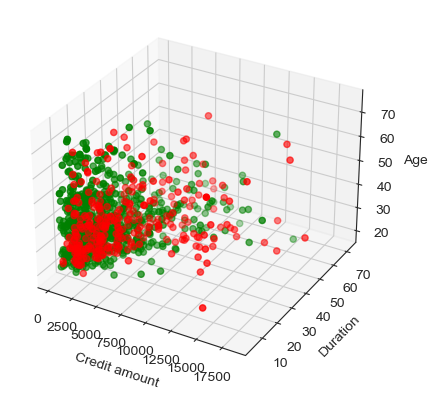

In [17]:
from mpl_toolkits.mplot3d import Axes3D
data_good = data[data['credit_risk'] == 'good']
data_bad = data[data['credit_risk'] == 'bad']

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

xg = data_good['amount']
yg = data_good['duration']
zg = data_good['age']
xb = data_bad['amount']
yb = data_bad['duration']
zb = data_bad['age']

ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

ax.scatter(xb, yb, zb, c = 'r')
ax.scatter(xg, yg, zg, c = 'g')

plt.show()
#Большее скопление данных наблюдается у задней левой грани, то есть люди берут в основном небольшие суммы. Также тут снова виден диапазон частых возрастов 20-40 лет и небольшой срок займа. Выбросы опять таки в основном bad. 

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [18]:
data["decoded_status"] = data["status"].map({'no checking account': 0, '... < 0 DM': 1, '... >= 200 DM / salary for at least 1 year': 3, '0<= ... < 200 DM': 2, 'no checking account' :0})
data["decoded_credit_history"] = data["credit_history"].map({'no credits taken/all credits paid back duly' :0, 'all credits at this bank paid back duly': 1, 'existing credits paid back duly till now': 2, 'delay in paying off in the past': 3, 'critical account/other credits elsewhere': 4})
data["decoded_purpose"] = data["purpose"].map({'car (used)' :0, 'others': 1, 'retraining': 2, 'furniture/equipment': 3, 'car (new)': 4, 'business': 5, 'domestic appliances': 6, 'radio/television': 7, 'repairs': 8, 'vacation': 9})
data["decoded_savings"] = data["savings"].map({'unknown/no savings account' :0, '... <  100 DM': 1, '100 <= ... <  500 DM': 2, '500 <= ... < 1000 DM': 3, '... >= 1000 DM': 4})
data["decoded_employment_duration"] = data["employment_duration"].map({'< 1 yr': 1, '1 <= ... < 4 yrs': 2, '4 <= ... < 7 yrs': 3, '>= 7 yrs': 4, 'unemployed' :0})
data["decoded_installment_rate"] = data["installment_rate"].map({'< 20': 0, '25 <= ... < 35': 1, '20 <= ... < 25': 2, '>= 35': 3})
data["decoded_personal_status_sex"] = data["personal_status_sex"].map({'female : non-single or male : single': 0, 'male : married/widowed': 1, 'female : single': 2, 'male : divorced/separated': 3})
data["decoded_other_debtors"] = data["other_debtors"].map({'none': 0, 'guarantor': 1, 'co-applicant': 2})
data["decoded_present_residence"] = data["present_residence"].map({'< 1 yr': 0, '1 <= ... < 4 yrs': 1, '4 <= ... < 7 yrs': 2, '>= 7 yrs': 3})
data["decoded_property"] = data["property"].map({'unknown / no property': 0, 'car or other': 1, 'building soc. savings agr./life insurance': 2, 'real estate': 3})
data["decoded_other_installment_plans"] = data["other_installment_plans"].map({'none': 0, 'bank': 1, 'stores': 2})
data["decoded_housing"] = data["housing"].map({'for free': 0, 'rent': 1, 'own': 2})
data["decoded_number_credits"] = data["number_credits"].map({'1': 0, '2-3': 1, '4-5': 2, '>= 6': 3})
data["decoded_job"] = data["job"].map({'unemployed/unskilled - non-resident': 0, 'unskilled - resident': 1, 'skilled employee/official': 2, 'manager/self-empl./highly qualif. employee': 3})
data["decoded_people_liable"] = data["people_liable"].map({'0 to 2': 0, '3 or more': 1})
data["decoded_telephone"] = data["telephone"].map({'no': 0, 'yes (under customer name)': 1})
data["decoded_foreign_worker"] = data["foreign_worker"].map({'no': 0, 'yes': 1})
data["decoded_credit_risk"] = data["credit_risk"].map({'bad': 0, 'good': 1})
data = data.drop(['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk'], axis=1)

In [19]:
data = data.drop(['F'], axis = 1)
data # я выше немного не доудаляла. Тпереь датафрейм как надо выглядит

KeyError: "['F'] not found in axis"

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [20]:
data_no_amount = data.drop(["amount"], axis =1)
data_no_amount.sum(axis=1)
data

,duration,amount,age,decoded_status,decoded_credit_history,decoded_purpose,decoded_savings,decoded_employment_duration,decoded_installment_rate,decoded_personal_status_sex,...,decoded_present_residence,decoded_property,decoded_other_installment_plans,decoded_housing,decoded_number_credits,decoded_job,decoded_people_liable,decoded_telephone,decoded_foreign_worker,decoded_credit_risk
0,18,1049,21,0,1,0,0,1,0,0,...,3,1,0,0,0,2,0,0,0,1
1,9,2799,36,0,1,1,0,2,1,1,...,1,0,0,0,1,2,1,0,0,1
2,12,841,23,1,0,2,1,3,1,0,...,3,0,0,0,0,1,0,0,0,1
3,12,2122,39,0,1,1,0,2,2,1,...,1,0,0,0,1,1,1,0,1,1
4,12,2171,38,0,1,1,0,2,0,1,...,3,1,1,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,21,0,0,3,0,2,1,1,...,3,0,0,0,0,1,1,0,0,0
996,24,2303,45,0,0,1,0,4,0,1,...,0,0,0,1,0,2,0,0,0,0
997,21,12680,30,3,1,1,4,4,0,1,...,3,3,0,2,0,3,0,1,0,0
998,12,6468,52,1,0,3,4,0,1,1,...,0,3,0,1,0,3,0,1,0,0


In [22]:
print(data['decoded_credit_risk'].corr(data['duration']))
print(data['decoded_credit_risk'].corr(data['amount']))
print(data['decoded_credit_risk'].corr(data['age']))
print(data['decoded_credit_risk'].corr(data['decoded_status']))
print(data['decoded_credit_risk'].corr(data['decoded_credit_history']))
print(data['decoded_credit_risk'].corr(data['decoded_purpose']))
print(data['decoded_credit_risk'].corr(data['decoded_savings']))
print(data['decoded_credit_risk'].corr(data['decoded_employment_duration']))
print(data['decoded_credit_risk'].corr(data['decoded_installment_rate']))
print(data['decoded_credit_risk'].corr(data['decoded_personal_status_sex']))
print(data['decoded_credit_risk'].corr(data['decoded_present_residence']))
print(data['decoded_credit_risk'].corr(data['decoded_other_debtors']))
print(data['decoded_credit_risk'].corr(data['decoded_property']))
print(data['decoded_credit_risk'].corr(data['decoded_other_installment_plans']))
print(data['decoded_credit_risk'].corr(data['decoded_housing']))
print(data['decoded_credit_risk'].corr(data['decoded_number_credits']))
print(data['decoded_credit_risk'].corr(data['decoded_job']))
print(data['decoded_credit_risk'].corr(data['decoded_people_liable']))
print(data['decoded_credit_risk'].corr(data['decoded_telephone']))
print(data['decoded_credit_risk'].corr(data['decoded_foreign_worker']))
#результаты неутешительные, кажется банк рандомно определяет, кто хорош, а кто плох

-0.21492666544189087
-0.1547401455528129
0.09127194878302208
0.35084748282677825
-0.11586462158066435
0.035235123086731816
0.1789427359379215
0.11600203637423165
0.06422449976690521
0.024472147185102572
-0.0029671587541552323
-0.02844051795758578
-0.14261197337252604
-0.10488484631294502
0.018118911539652005
0.0457324893392065
-0.032735001380987554
0.003014853083344736
0.03646619017996351
0.08207949878149642


In [23]:
def predict(Xtest: np.array) -> np.array:  #ну я сделала анализ корреляций, поняла, что там связи слабые. А потом поняла что если всегда выдавать Good - 1 в моей системе, тпри условии, что у нас 700 из 1000 это good, то получится неплохо.)
    pred = [1] * len(Xtest)
    return pred

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('decoded_credit_risk', 1).values
y = data['decoded_credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

accuracy_score(y_test, predict(X_test))

/var/folders/88/tymt890x2_sfnd250t4vckpr0000gn/T/ipykernel_16475/925110243.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('decoded_credit_risk', 1).values


0.66

In [66]:
def predict(Xtest: np.array) -> np.array:  #а тут серьезно, но не получилось. Хотела обозначить за 0 (bad), тех у кого одновременно и '... < 0 DM', и 'unknown/no savings account', так как у этих категорий почти самое адекваное соотношение bad/good, ну и самая большая численность bad. Для осторожности я хотела пересечение этих множеств.  
    pred = [1] * len(Xtest)
    xtest1 = np.array(Xtest['decoded_status'])
    xtest2 = np.array(Xtest['decoded_savings'])
    for i in range(len(xtest1)):
        if ((xtest1[i] == '... < 0 DM') and (xtest2[i] == 'unknown/no savings account')):
            pred[i] = 0
    return pred

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('decoded_credit_risk', 1).values
y = data['decoded_credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

accuracy_score(y_test, predict(X_test))

/var/folders/88/tymt890x2_sfnd250t4vckpr0000gn/T/ipykernel_16475/1404899435.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('decoded_credit_risk', 1).values


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices